<a href="https://colab.research.google.com/github/andy311p/Udemy_deep_learning_pytorch/blob/master/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

In [ ]:
train_dataset = dsets.MNIST(root='./data', 
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)
test_dataset = dsets.MNIST(root='./data', 
                            train=False,
                            transform=transforms.ToTensor(),
                            download=True)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


# New Section

# New Section

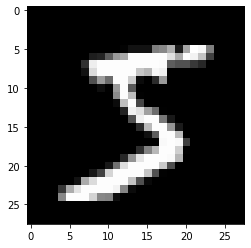

In [ ]:
#show image
import numpy as np
import matplotlib.pyplot as plt

img = train_dataset[0][0].numpy().reshape(28,28)
plt.imshow(img,cmap='gray')

In [ ]:
batch_size = 100
n_iters = 3000
num_epochs = int(n_iters / (len(train_dataset)/batch_size))

#iterable object
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)

#this is how to check if object os oterable-START
import collections
isinstance(train_loader, collections.Iterable)
#this is how to check if object os oterable-END

True

In [ ]:
class LogisticRegressionModel(nn.Module):
  def __init__(self,input_dim,output_dim):
    super(LogisticRegressionModel,self).__init__()
    self.linear = nn.Linear(input_dim,output_dim)

  def forward(self,x):
    out = self.linear(x)
    return out  

In [ ]:
#image size
input_dim = 28*28
#num of classes(digits 0-9)
output_dim=10
model = LogisticRegressionModel(input_dim,output_dim)
#computes the softmax automatically
criterion = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [ ]:
iter = 0
for epoch in range(num_epochs):
  for i, (images,labels) in enumerate(train_loader):
    images = Variable(images.view(-1,28*28))
    labels = Variable(labels)

    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs,labels)
    loss.backward()
    optimizer.step()

    iter += 1
    #every 500 iteration calculate accuracy
    if iter % 500 == 0:
      correct = 0.0
      total = 0.0
      #calc accuracy on test data
      for images, labels in test_loader:
        images = Variable(images.view(-1,28*28))
        outputs = model(images)
        _, predictions = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predictions == labels).sum()

      accuracy = 100 * correct / total
      print('iteration: {}. loss: {} Accuracy: {}'.format(iter, loss.data,accuracy)) 


iteration: 500. loss: 1.8649994134902954 Accuracy: 67.83999633789062
iteration: 1000. loss: 1.5426483154296875 Accuracy: 77.30999755859375
iteration: 1500. loss: 1.3245201110839844 Accuracy: 80.11000061035156
iteration: 2000. loss: 1.2220348119735718 Accuracy: 81.33000183105469
iteration: 2500. loss: 0.9850779175758362 Accuracy: 82.41999816894531
iteration: 3000. loss: 1.0380542278289795 Accuracy: 83.13999938964844


In [ ]:
print(10/2)

5.0
